In [1]:
#! pip install -U climetlab --quiet
#! pip install -U climetlab_s2s_ai_challenge --quiet

In [2]:
import climetlab as cml 

In [3]:
import climetlab_s2s_ai_challenge
print(f'Climetlab version : {cml.__version__}')
print(f'Climetlab-s2s-ai-challenge plugin version : {climetlab_s2s_ai_challenge.__version__}')

Climetlab version : 0.6.1
Climetlab-s2s-ai-challenge plugin version : 0.4.18


In [4]:
import os
# When running in continous integration in github,
# append "-dev" to the datasets name to download only a fragment of data
# Warning : do not use the "-dev" datasets for training ML models.
if os.environ.get('GITHUB_ACTIONS'):
    is_test = '-dev'
else:
    is_test = ''

# Using netcdf data

In [5]:
FORMAT = 'netcdf'

Let us download netcdf file for total precipitation (tp) for one given date from the training-input dataset :

In [6]:
cmlds = cml.load_dataset("s2s-ai-challenge-training-input"+is_test,
                         origin='ecmwf',
                         date=20200102,
                         parameter='tp',
                         format=FORMAT)

By downloading data from this dataset, you agree to the terms and conditions defined at https://apps.ecmwf.int/datasets/data/s2s/licence/. If you do not agree with such terms, do not download the data. 


This climetlab dataset can be used as a xarray.Dataset or as a pandas.DataFrame :

In [7]:
cmlds.to_xarray()

<xarray.Dataset>
Dimensions:        (forecast_time: 20, latitude: 121, lead_time: 47, longitude: 240, realization: 11)
Coordinates:
  * realization    (realization) int64 0 1 2 3 4 5 6 7 8 9 10
  * forecast_time  (forecast_time) datetime64[ns] 2000-01-02 ... 2019-01-02
  * lead_time      (lead_time) timedelta64[ns] 0 days 1 days ... 45 days 46 days
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    valid_time     (forecast_time, lead_time) datetime64[ns] dask.array<chunksize=(20, 47), meta=np.ndarray>
Data variables:
    tp             (realization, forecast_time, lead_time, latitude, longitude) float32 dask.array<chunksize=(11, 20, 47, 121, 240), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2021-05-10T16:37 GRIB to CDM+CF via cfgrib-0.9.9...

We can get the temperature parameter (2t) in a similar fashion. The "date" and "parameter" arguments also accept lists of values.

In [8]:
cml.load_dataset("s2s-ai-challenge-training-input"+is_test,
                         origin='ecmwf',
                         date=20200102,
                         parameter='2t',
                         format=FORMAT).to_xarray()

<xarray.Dataset>
Dimensions:        (forecast_time: 20, latitude: 121, lead_time: 46, longitude: 240, realization: 11)
Coordinates:
  * realization    (realization) int64 0 1 2 3 4 5 6 7 8 9 10
  * forecast_time  (forecast_time) datetime64[ns] 2000-01-02 ... 2019-01-02
  * lead_time      (lead_time) timedelta64[ns] 1 days 2 days ... 45 days 46 days
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    valid_time     (forecast_time, lead_time) datetime64[ns] dask.array<chunksize=(20, 46), meta=np.ndarray>
Data variables:
    t2m            (realization, forecast_time, lead_time, latitude, longitude) float32 dask.array<chunksize=(11, 20, 46, 121, 240), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2021-05-10T16:32 GRIB to CDM+CF via cfgrib-0.9.9...

Data from the forecast-input dataset can be retrieve in a similar fashion:

In [9]:
cml.load_dataset("s2s-ai-challenge-forecast-input"+is_test,
                         origin='ecmwf',
                         date=["20200102","20200109"],
                         parameter='2t',
                         format=FORMAT).to_xarray()

By downloading data from this dataset, you agree to the terms and conditions defined at https://apps.ecmwf.int/datasets/data/s2s/licence/. If you do not agree with such terms, do not download the data. 


<xarray.Dataset>
Dimensions:        (forecast_time: 2, latitude: 121, lead_time: 46, longitude: 240, realization: 51)
Coordinates:
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02 2020-01-09
  * lead_time      (lead_time) timedelta64[ns] 1 days 2 days ... 45 days 46 days
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    valid_time     (forecast_time, lead_time) datetime64[ns] dask.array<chunksize=(1, 46), meta=np.ndarray>
Data variables:
    t2m            (realization, forecast_time, lead_time, latitude, longitude) float32 dask.array<chunksize=(51, 1, 46, 121, 240), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2021-05-10T15:44:55 GRIB to CDM+CF via cfgrib-0....

### Computing average and plotting

In [10]:
ds = cml.load_dataset("s2s-ai-challenge-forecast-input"+is_test,
                         origin='ecmwf',
                         date=["20200102","20200109"],
                         parameter='2t',
                         format=FORMAT).to_xarray()

In [11]:
mean1 = ds.mean(dim="lead_time")
mean1.compute()
#cml.plot_map(mean1.isel(forecast_time=0, realization=0))

<xarray.Dataset>
Dimensions:        (forecast_time: 2, latitude: 121, longitude: 240, realization: 51)
Coordinates:
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02 2020-01-09
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
Data variables:
    t2m            (realization, forecast_time, latitude, longitude) float32 ...

In [27]:
mean2 = ds.mean(dim="forecast_time")
mean2 = mean2.compute()
# mean2

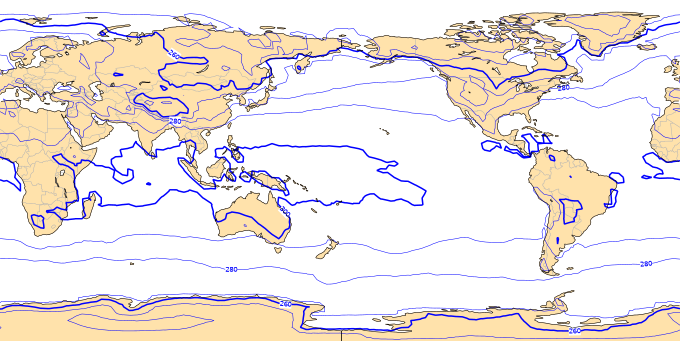

In [23]:
cml.plot_map(mean2.isel(lead_time=2, realization=0))

In [28]:
mean3 = ds[['t2m','valid_time']].groupby('valid_time').mean()['t2m']
mean3 = mean3.compute()
# mean3

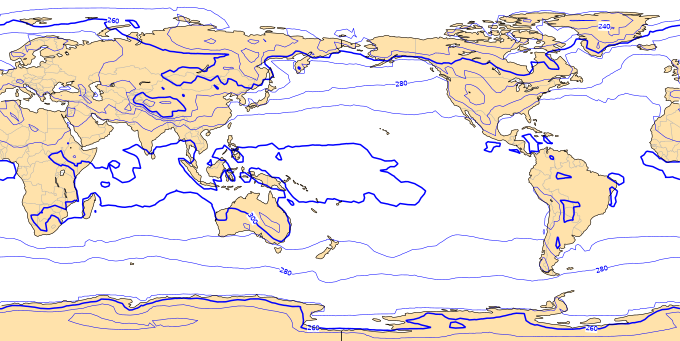

In [25]:
cml.plot_map(mean3.isel(valid_time=2, realization=0))